
<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Sesiones/Laboratorio_redes_neuronales_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio redes neuronales convolucionales

### Dayana Andrea Henao Arbeláez

In [23]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


1. Importar las librerias:
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras
```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras

2026-01-04 10:18:59.568331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



2. Cargar los datos de entrenamiento y test
```python
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
```

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
print('Datos de entrenamiento:',X_train.shape)
print('Datos de test:',X_test.shape)

Datos de entrenamiento: (60000, 28, 28)
Datos de test: (10000, 28, 28)


3. Normalizar los datos.

In [5]:
X_train=X_train/255.0
X_test=X_test/255.0

4. Realizar una visualización de 20 imagenes aproximadamente, puede emplear el comando imshow con cmap= binary

```python
  ax.imshow(X_train[i],cmap='binary')
```

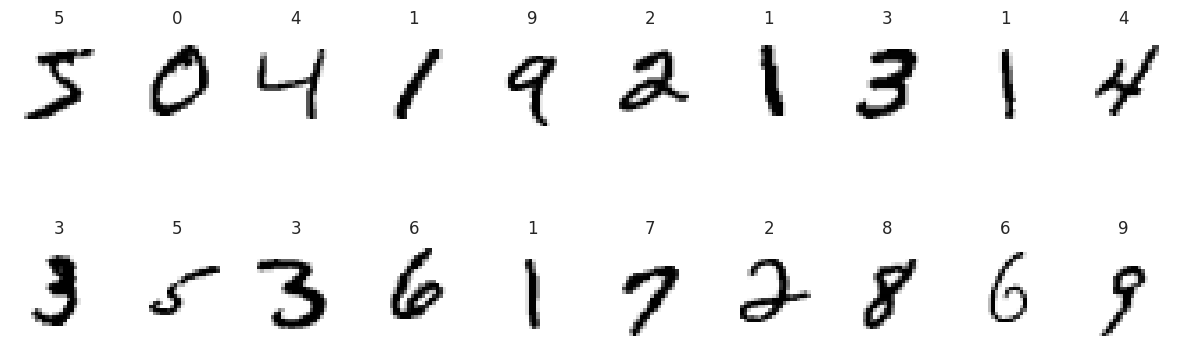

In [6]:
fig,ax=plt.subplots(2,10,figsize=(15,5))
for i,ax in enumerate(ax.flat):
  ax.imshow(X_train[i],cmap='binary')
  ax.set_axis_off()
  ax.set_title(y_train[i])

5. Implementar en keras, la red Letnet5, la arquitectura de la red es la siguiente:

![img](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/LeNet5.png?raw=true)


Par la implementación, se recomienda construir un modelo secuencial.


```python
keras.backend.clear_session()
models=keras.models.Sequential([...])

```

algunos parámetros que pueden ser pasados dentro de los tres puntos anteriores son:


```python
keras.layers.MaxPool2D,
keras.layers.Conv2D,
keras.layers.Flatten,
keras.layers.Dense
```

Revisa la documentación para pasar los valores adecuados.

In [7]:
keras.backend.clear_session()

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1, padding='valid', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, padding='valid', activation='relu', kernel_initializer='he_uniform'),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),          # 5×5×16 = 400
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-04 10:19:02.243554: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2026-01-04 10:19:02.243583: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:160] env: CUDA_VISIBLE_DEVICES="-1"
2026-01-04 10:19:02.243588: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2026-01-04 10:19:02.243591: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.c

6. Revisa el modelo que acabaste de construir.
```python
model.summary()
```

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

7. Vamos a utlizar un optimizador de Adams,  El optimizador de Adam (Adaptive Moment Estimation) combina las ventajas de los algoritmos RMSProp y Momentum para mejorar el proceso de aprendizaje de un modelo. Al igual que Momentum, Adam utiliza una estimación del momento y de la magnitud de los gradientes  para actualizar los parámetros del modelo en cada iteración. Sin embargo, en lugar de utilizar una tasa de aprendizaje constante para todos los parámetros, Adam adapta la tasa de aprendizaje de cada parámetro individualmente en función de su estimación del momento y de la magnitud del gradiente. Esto permite que el modelo se ajuste de manera más eficiente y efectiva a los datos de entrenamiento, lo que puede llevar a una mayor precisión de la predicción en comparación con otros métodos de optimización.


El optimizador de Adam es un algoritmo de optimización basado en gradientes de primer orden que utiliza estimaciones adaptativas de momentos de primer y segundo orden. El algoritmo se puede describir de la siguiente forma :

$$
\begin{aligned}
& \text{Inicializar:} \quad \theta_0, \alpha, \beta_1, \beta_2, \epsilon \\
& \text{Para cada iteración } t = 1, 2, \dots \\
& \quad \text{Obtener el gradiente:} \quad g_t = \nabla_\theta J(\theta_{t-1}) \\
& \quad \text{Actualizar los momentos de primer orden:} \quad m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
& \quad \text{Actualizar los momentos de segundo orden:} \quad v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
& \quad \text{Corregir el sesgo de los momentos de primer orden:} \quad \hat{m}_t = \frac{m_t}{1 - \beta_1^t} \\
& \quad \text{Corregir el sesgo de los momentos de segundo orden:} \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \\
& \quad \text{Actualizar los parámetros:} \quad \theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
\end{aligned}
$$

Donde $\theta$ son los parámetros del modelo, $\alpha$ es la tasa de aprendizaje, $\beta_1$ y $\beta_2$ son los factores de decaimiento de los momentos, $\epsilon$ es un término de suavizado para evitar la división por cero, $J$ es la función objetivo, $g_t$ es el gradiente en la iteración $t$, $m_t$ y $v_t$ son los momentos de primer y segundo orden respectivamente, y $\hat{m}_t$ y $\hat{v}_t$ son las correcciones de sesgo de los momentos.




emplea el siguiente compilador del modelo
```python
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 ```

In [10]:
model.compile?

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    loss_weights=None,
    metrics=None,
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile='auto',
    auto_scale_loss=True,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
        `keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
        a `keras.losses.Loss` instance. See `keras.losses`. A
        loss function is any callable with the signature
        `loss = fn(y_true, y_pred)`, where `y_true` are the ground truth
        values, and `y_pred` are the model's predictions.
        `y_true` should have shape `(batch_size, d0

In [11]:
import os
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

 8. Realiza el fit del modelo, emplea GPU, para ello cambia la configuración de collaboratory para que tu modelo se ejecute un poco mas rápido.


 ```python
 history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)
```


- Loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de entrenamiento. Es una función que se quiere minimizar durante el entrenamiento. Un valor bajo de loss indica que el modelo se ajusta bien a los datos de entrenamiento.
- Accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de entrenamiento. Es una métrica que se quiere maximizar durante el entrenamiento. Un valor alto de accuracy indica que el modelo clasifica bien los datos de entrenamiento.
- Val_loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de validación. Los datos de validación son un subconjunto de los datos de entrenamiento que se reservan para evaluar el rendimiento del modelo durante el entrenamiento. Un valor bajo de val_loss indica que el modelo se generaliza bien a los datos de validación.
- Val_accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de validación. Un valor alto de val_accuracy indica que el modelo clasifica bien los datos de validación.

In [14]:
import tensorflow as tf

print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))


GPUs disponibles: []


In [15]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9300 - loss: 0.2296 - val_accuracy: 0.9646 - val_loss: 0.1165
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9755 - loss: 0.0800 - val_accuracy: 0.9746 - val_loss: 0.0826
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9829 - loss: 0.0551 - val_accuracy: 0.9806 - val_loss: 0.0667
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9837 - val_loss: 0.0567
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9883 - loss: 0.0362 - val_accuracy: 0.9833 - val_loss: 0.0580
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9844 - val_loss: 0.0574
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0253 - val_accuracy: 0.9853 - val_loss: 0.0570
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9927 - loss: 0.0227 - 


9. Realiza la predicción:
```python
q=model.predict(X_test)
```

In [16]:
q=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


10. Muestra los valores de q y determina que numero se esta prediciendo.

In [20]:
q[0], y_test[0]

(array([4.7751278e-12, 4.5792139e-09, 6.7062049e-09, 1.6919178e-09,
        5.7103888e-10, 8.7828794e-10, 1.5082312e-16, 9.9999982e-01,
        8.4156015e-10, 1.7081143e-07], dtype=float32),
 np.uint8(7))

In [22]:
np.shape(q), np.argmax(q[0])

((10000, 10), np.int64(7))


11. Puede graficar la convergencia del modelo con los siguiente código
```python
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()
```

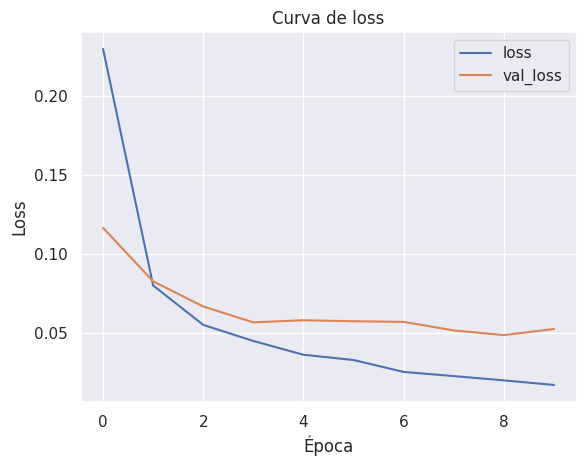

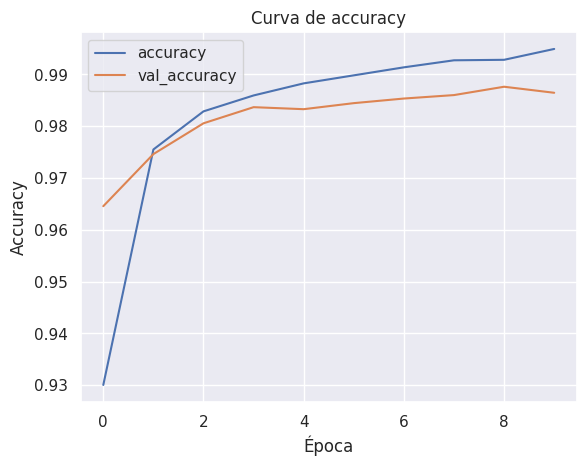

In [18]:
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()

12. Una forma alterna de implementar el modelo puede ser dada de la siguiente forma:



```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
```

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [25]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [26]:
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,802 (354.70 KB)

 Trainable params: 90,802 (354.70 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])


In [29]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9314 - loss: 0.2193 - val_accuracy: 0.9626 - val_loss: 0.1176
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9781 - loss: 0.0702 - val_accuracy: 0.9733 - val_loss: 0.0850
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9840 - loss: 0.0508 - val_accuracy: 0.9800 - val_loss: 0.0645
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9836 - val_loss: 0.0569
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9844 - val_loss: 0.0513
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9916 - loss: 0.0257 - val_accuracy: 0.9848 - val_loss: 0.0529
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9820 - val_loss: 0.0641
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9942 - loss: 0.0183 - 

In [30]:
q=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
q.argmax(axis=1), y_test

(array([7, 2, 1, ..., 4, 5, 6], shape=(10000,)),
 array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8))


13. Emplea la arquitectura anterior para el  
  el dataset cifar100,  empleando BatchNormalization y dropout.


- BatchNormalization es una técnica que se usa para acelerar y estabilizar el entrenamiento de las redes neuronales artificiales, mediante la normalización de las entradas de cada capa, re-centrando y re-escalando los datos.

  BatchNormalization se aplica justo antes de la función de activación de cada capa, y consiste en centrar y normalizar cada mini-lote con una media y una desviación estándar calculadas con los datos del mini-lote, y luego re-escalar y desplazar los datos de nuevo con parámetros aprendidos por la red durante el entrenamiento. Estos parámetros permiten que la red se adapte a la distribución óptima de las activaciones para cada capa. Además, al introducir cierto ruido en los datos, BatchNormalization actúa como una regularización y ayuda a reducir el sobreajuste.


- El dropout es una técnica de regularización para reducir el sobreajuste en redes neuronales artificiales. El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalizar a nuevos datos. El dropout consiste en eliminar aleatoriamente algunas neuronas de la red durante el entrenamiento, lo que hace que el modelo sea más robusto y menos dependiente de ciertas conexiones. El dropout se puede interpretar como una forma de promediar varios modelos más pequeños y diferentes, lo que mejora el rendimiento final.

  El dropout se aplica a cada capa de la red, especificando una probabilidad de mantener cada neurona activa. Por ejemplo, si se usa un dropout de 0.2, significa que el 20% de las neuronas se desactivarán en cada iteración del entrenamiento. El dropout solo se usa durante el entrenamiento, no durante la inferencia o la evaluación. El dropout se puede combinar con otras técnicas de regularización, como la normalización de pesos o la normalización por lotes.




```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras


(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()


plt.imshow(train_image[30])
plt.axis('off')
```

intenta agregar, lineas como las siguientes en los lugares mas estrategicos:


```python
keras.layers.Dropout(0.2),
keras.layers.BatchNormalization()
```

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras

In [33]:
(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

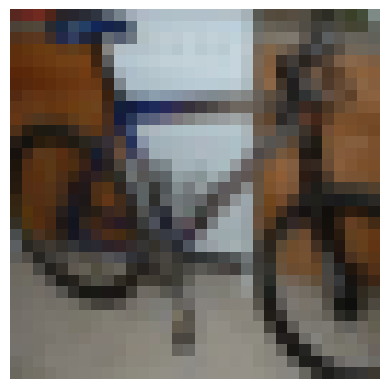

In [34]:
plt.imshow(train_image[30])
plt.axis('off')

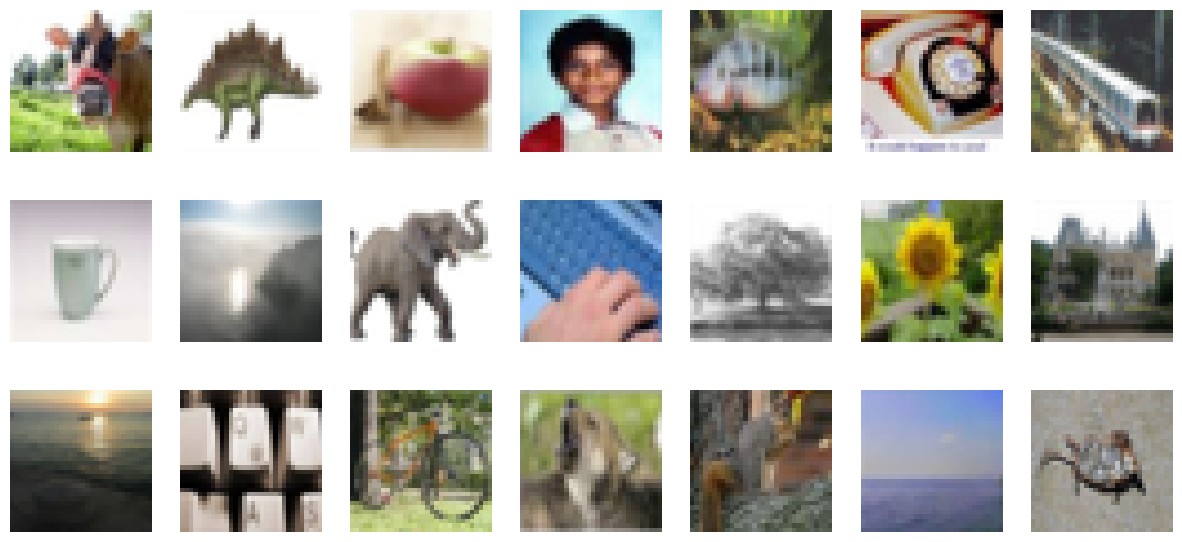

In [40]:
fig , ax = plt.subplots(3,7, figsize=(15,7))
for i, ax in enumerate(ax.flat):
  ax.imshow(train_image[i], cmap='Greys')
  ax.axis('off')

In [38]:
train_label[0]

array([19])

In [41]:
train_image = train_image.astype('float32') / 255.0
test_image = test_image.astype('float32') / 255.0

In [42]:
keras.backend.clear_session()
model = keras.models.Sequential([
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal',  padding='same', strides=(1,1)),
      keras.layers.Dropout(0.2),
      keras.layers.BatchNormalization(),

      keras.layers.MaxPool2D(pool_size=(2,2)),

      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(100, activation='softmax')
])

/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,90

 Total params: 563,972 (2.15 MB)

 Trainable params: 563,076 (2.15 MB)

 Non-trainable params: 896 (3.50 KB)

14. Emplea el siguiente compilador:

El optimizador de NAdam (Nesterov-accelerated Adaptive Moment Estimation) es una variante de Adam que incorpora el método de Nesterov, que consiste en utilizar una predicción de la posición futura de los parámetros para calcular el gradiente, en lugar de la posición actual. Esto hace que el algoritmo sea más sensible a los cambios de dirección del gradiente y evite oscilaciones innecesarias. NAdam también modifica la forma de calcular el momento y la magnitud del gradiente, usando una media móvil exponencial sesgada hacia cero en lugar de una media móvil exponencial simple.


```python
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

In [44]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


El número de épocas que se necesita para entrenar una red neuronal depende de varios factores, como el tamaño de los datos, la complejidad del modelo, la función de pérdida, el algoritmo de optimización, la tasa de aprendizaje, etc. No hay una regla fija para elegir el número de épocas, pero se puede usar el criterio de parada temprana, que consiste en monitorear el error de validación y detener el entrenamiento cuando este empiece a aumentar, lo que indica un sobreajuste del modelo.

15. Emplea early_stooping y realiza el fit



```python
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
```

El parámetro patience=5 indica el número de épocas sin mejora después de las cuales se detendrá el entrenamiento. El parámetro restore_best_weights=True indica que se restaurarán los pesos del modelo desde la época con el mejor valor de la métrica monitoreada. Esto puede ayudar a evitar el sobreajuste y mejorar el rendimiento del modelo



```python
history = model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])
```

In [45]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [46]:
history = model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.1312 - loss: 3.8497 - val_accuracy: 0.2107 - val_loss: 3.3773
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.2614 - loss: 2.9907 - val_accuracy: 0.3067 - val_loss: 2.7546
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.3467 - loss: 2.5471 - val_accuracy: 0.3819 - val_loss: 2.4558
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.4020 - loss: 2.2817 - val_accuracy: 0.4011 - val_loss: 2.3324
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.4460 - loss: 2.0766 - val_accuracy: 0.4183 - val_loss: 2.3039
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.4820 - loss: 1.9169 - val_accuracy: 0.4467 - val_loss: 2.1827
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.5151 - loss: 1.7806 - val_accuracy: 0.4551 - val_loss: 2.2167
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.5428 - loss: 1.6451 - 

In [47]:
model.evaluate(test_image, test_label, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5020 - loss: 2.0250


[2.0249829292297363, 0.5019999742507935]

Ahora vamos a implementar una red VGG16, para ello puedes emplear la siguiente linea de código:


```python
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg -O african_elephant.jpg
#!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)
```


```python
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

```


```python
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)# Añadir una dimensión extra para el lote
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])
```

--2026-01-04 11:38:10--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolviendo upload.wikimedia.org (upload.wikimedia.org)... 2620:0:861:ed1a::2:b, 208.80.154.240
Conectando con upload.wikimedia.org (upload.wikimedia.org)[2620:0:861:ed1a::2:b]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 168370 (164K) [image/jpeg]
Guardando como: ‘indian_elephant.jpg’

indian_elephant.jpg 100%[===================>] 164,42K   536KB/s    en 0,3s    

2026-01-04 11:38:10 (536 KB/s) - ‘indian_elephant.jpg’ guardado [168370/168370]

--2026-01-04 11:38:11--  https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg
Resolviendo upload.wikimedia.org (upload.wikimedia.org)... 2620:0:861:ed1a::2:b, 208.80.154.240
Conectando con upload.wikimedia.org (upload.wikimedia.org)[2620:0:861:ed1a::2:b]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 11612484 (

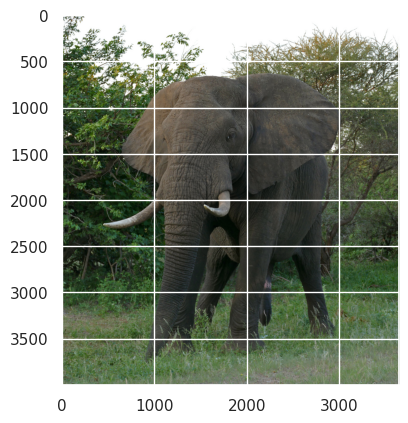

In [48]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg -O african_elephant.jpg
#!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

In [49]:
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)# Añadir una dimensión extra para el lote
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
Prediction [('n02504458', 'African_elephant', np.float32(0.90143245)), ('n01871265', 'tusker', np.float32(0.08966324)), ('n02504013', 'Indian_elephant', np.float32(0.008881166))]
